In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Placement.csv')

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1)Replace the NaN values with correct value. And justify why you have  chosen the same.
 

In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
data['salary'].fillna(0,inplace=True) 

# I choose to fill the null values with 0 since if i fill it with anyother strategy like mean/median/mode ,then it change the behaviour of the certain row

# 2)How many of them are not placed?

In [6]:
Not_placed=data[data['status']=='Not Placed']['status'].count()

In [7]:
Not_placed

67

In [8]:
data.drop('sl_no',inplace=True,axis=1)

# 3)Find the reason for non placement from the dataset?

In [9]:
data.groupby("status").mean()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,0.000000
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [10]:
from scipy.stats import ttest_ind

# List of numerical columns to compare
num_cols = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]

for col in num_cols:
    placed = data[data["status"] == "Placed"][col].dropna()
    not_placed = data[data["status"] == "Not Placed"][col].dropna()
    
    stat, p = ttest_ind(placed, not_placed, equal_var=False)
    print(f"{col}: p-value = {p:.5f}")


ssc_p: p-value = 0.00000
hsc_p: p-value = 0.00000
degree_p: p-value = 0.00000
etest_p: p-value = 0.04958
mba_p: p-value = 0.25669


In [11]:
from scipy.stats import chi2_contingency

# Work Experience vs Placement
contingency_table = pd.crosstab(data["workex"], data["status"])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Work Experience vs Placement: p-value = {p:.5f}")

# Degree Type vs Placement
contingency_table = pd.crosstab(data["degree_t"], data["status"])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Degree Type vs Placement: p-value = {p:.5f}")


Work Experience vs Placement: p-value = 0.00010
Degree Type vs Placement: p-value = 0.22661


In [12]:
# from the above three cells we can get the reason for the not placement
"""
1st: The test score like ssc_p,hsc_p,etest_p,mba_p,degree_p are low for non-placement students
    
2nd: T-test is done between the status and all numeriacal columns
     
     From that we can conclude that except mba_p, all other columns are affecting tha placemnt

3rd: Chi-square is done between status and workex and  Degree_t

     From that we can conclude that workex is affecting placement """

'\n1st: The test score like ssc_p,hsc_p,etest_p,mba_p,degree_p are low for non-placement students\n    \n2nd: T-test is done between the status and all numeriacal columns\n     \n     From that we can conclude that except mba_p, all other columns are affecting tha placemnt\n\n3rd: Chi-square is done between status and workex and  Degree_t\n\n     From that we can conclude that workex is affecting placement '

# 4)What kind of relation between salary and mba_p

In [13]:
data['mba_p'].corr(data['salary'])

0.13982273892615565

In [14]:
# the correlation between mba_p and salary is 0.13 , it is about 14%. Since it is in positive range it is positive correlation

# 5)Which specialization is getting minimum salary?

In [15]:
#Which specialization student get minimum salary

data[data['salary']>0]['specialisation'].min()

'Mkt&Fin'

# 6)How many of them getting above 500000 salary

In [16]:
data[data['salary']>500000]['salary'].count()

3

#  7)Test the Analysis of Variance between etest_p and mba_p at signifance  level 5%.(Make decision using Hypothesis Testing)

In [17]:
import  scipy.stats as stats
stats.f_oneway(data['mba_p'],data['etest_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [18]:
# Null hypothesis: There is no signifiacant difference between mba_p and etest_p
# Alternate hypothesis: There is significant difference between mba_p and etest_p
# p-value is greater than 0.05, so we accept Null hupothesis.

#  8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Makedecision using Hypothesis Testing)

In [19]:
#statement:Test the similarity between Sci&Tech and Mkt&HR based on salary

# Null hypothesis: There is no significant difference
# Alternate hypothesis: There is significant difference

In [20]:
degree=data[data['degree_t']=='Sci&Tech']['salary']
mr=data[data['specialisation']=='Mkt&HR']['salary']

from  scipy.stats import ttest_ind

ttest_ind(degree,mr)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [21]:
# The p-value is lesser than 0.05 , we reject null hypothesis

#  9)Convert the normal distribution to standard normal distribution for salary colum

C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


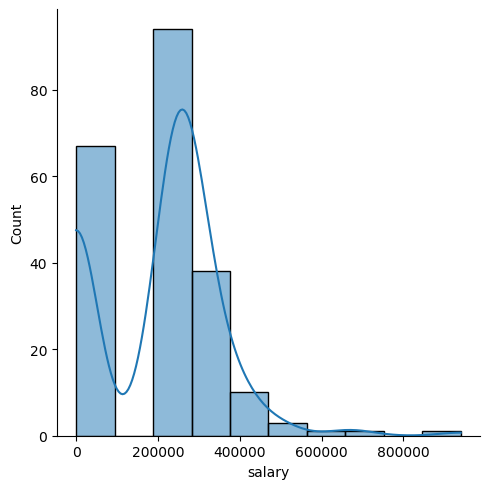

In [22]:
sns.displot(data['salary'],kde=True)

In [23]:
def stdfun(col):
    import seaborn as sns
    mean=col.mean()
    std=col.std()
    
    val=[i for i in col]
    
    z=[((x-mean)/std) for x in val]
    sns.displot(z,kde=True)
    sum(z)/len(z)

C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


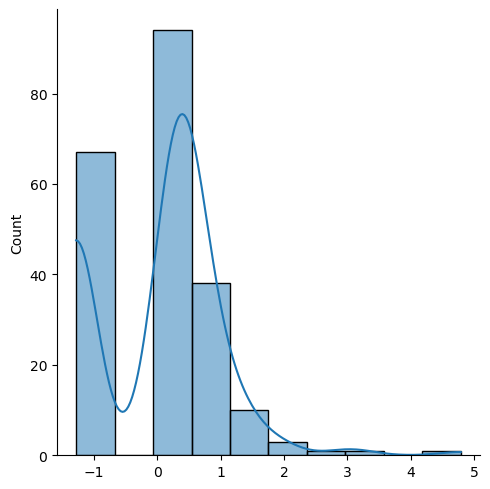

In [24]:
stdfun(data['salary'])

#  10)What is the probability Density Function of the salary range from 700000 to 900000?

In [25]:
def pdf_get(col,start,end):
    from scipy.stats import norm
    from matplotlib import pyplot
    ax=sns.distplot(col,kde=True,kde_kws={'color':'blue'},color='Green')
    #sns.kdeplot(col,color="Red",fill=True,label='PDF')
    
    pyplot.axvline(start,color="pink", linestyle="dashed", label="Start")
    pyplot.axvline(end, color="red", linestyle="dashed", label="End")
    
    mean=col.mean()
    std=col.std()
    
    dist=norm(mean,std)
    
    values=[i for i in range(start,end)]
    prob=[dist.pdf(i) for i  in values]
    area=sum(prob)
    
    print(f"The area between {start} and {end} is {area}")
    

C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

The area between 700000 and 900000 is 0.0005973310593974868


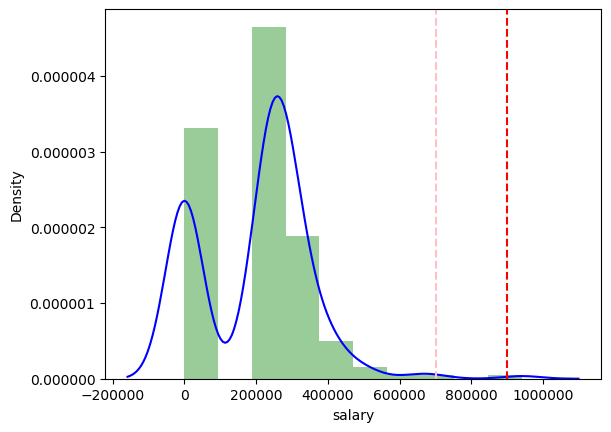

In [26]:
pdf_get(data['salary'],700000,900000)

# 11)Test the similarity between the degree_t(Sci&Tech)with respect toetest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [27]:
from scipy.stats import ttest_rel
etest=data[data['degree_t']=='Sci&Tech']['etest_p']
mba=data[data['degree_t']=='Sci&Tech']['mba_p']

ttest_rel(etest,mba)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [28]:
# Null hypothesis: There is no signifiacnt difference between etest_p and mba_p of Sci&Tech
# Alternate hypothesis: There is signifiacnt difference between etest_p and mba_p of Sci&Tech

In [29]:
# The p-value is greater than 0.05, so we accept null hypothesis

#  12)Which parameter is highly correlated with salary?

In [30]:
data.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [31]:
# From the above table we can infer that salary is highly correlated with ssc_p

# 13) plot any useful graph and explain it.

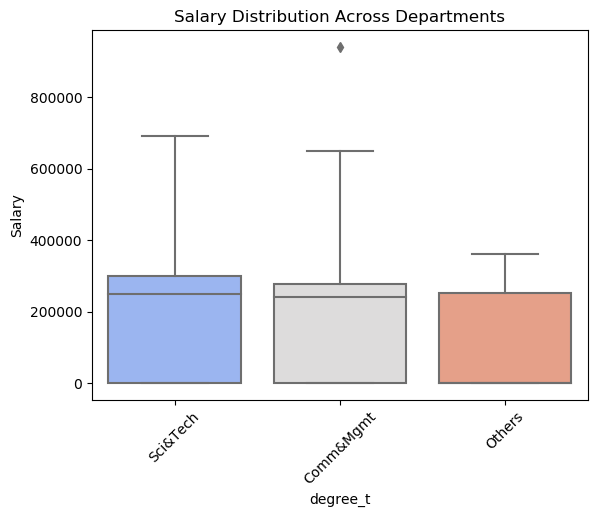

In [33]:
sns.boxplot(x=data['degree_t'], y=data['salary'], palette="coolwarm")
from matplotlib import pyplot as plt
plt.xlabel("degree_t")
plt.ylabel("Salary")
plt.title("Salary Distribution Across Departments")
plt.xticks(rotation=45)
plt.show()

In [34]:
# The Sci&Tech and comm&Mgmt has similar median salary which is intrepted from the line inside the box
# The box size of Sci&Tech and comm&Mgmt are greater than others , thus it shows the salary in these departments has wider variety than others
# The vertical line above the all boxes indicate their maximum
# There is black dot in inside the graph box which indicate the outliler